<a href="https://colab.research.google.com/github/danielleitesoares/tccuea/blob/main/teste_tif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Configurando o ambiente**



In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#Instalção de Pacotes
!pip install rasterio
!pip install geopandas

In [ ]:
#Importação de Libs
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import rasterio
from rasterio.plot import show

## **2. Carregando/preparando as imagens**

In [ ]:
expo_dprvi = r'/content/drive/MyDrive/TCC/dataset_imagens/imagens_recortadas/exp_dprvi.tif'
expo_sigma0 = r'/content/drive/MyDrive/TCC/dataset_imagens/imagens_recortadas/expo_sigma0.tif'
expo_entr_alpha = r'/content/drive/MyDrive/TCC/dataset_imagens/imagens_recortadas/expo_entr_alpha.tif'
expo_poligonos = r'/content/drive/MyDrive/TCC/dataset_imagens/imagens_recortadas/expo_poligonos.tif'
expo_razao_VH_VV = r'/content/drive/MyDrive/TCC/dataset_imagens/imagens_recortadas/expo_razao_VH_VV.tif'

In [ ]:
ds_expo_dprvi= rasterio.open(expo_dprvi)
ds_expo_sigma0 = rasterio.open(expo_sigma0)
ds_expo_entr_alpha = rasterio.open(expo_entr_alpha)
ds_expo_poligonos = rasterio.open(expo_poligonos)
ds_expo_razao_VH_VV = rasterio.open(expo_razao_VH_VV)

In [ ]:
mdata_expo_dprvi = ds_expo_dprvi.read()
mdata_expo_sigma0 = ds_expo_sigma0.read()
mdata_expo_entr_alpha = ds_expo_entr_alpha.read()
mdata_expo_poligonos = ds_expo_poligonos.read()
mdata_expo_razao_VH_VV = ds_expo_razao_VH_VV.read()

(array([81115173.,        0.,        0.,        0.,        0.,        0.,
               0.,        0.,        0., 69304338.]),
 array([0.0000000e+00, 3.3999999e+37, 6.7999998e+37, 1.0199999e+38,
        1.3600000e+38, 1.7000000e+38, 2.0399999e+38, 2.3800000e+38,
        2.7199999e+38, 3.0600000e+38, 3.4000000e+38], dtype=float32),
 <a list of 10 Patch objects>)

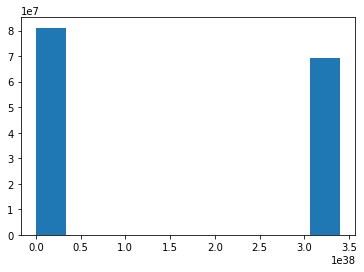

In [ ]:
plt.hist(mdata_expo_dprvi.flatten())

24.49624


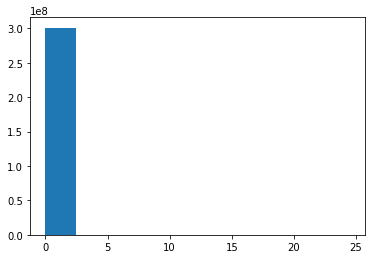

In [ ]:
plt.hist(mdata_expo_sigma0.flatten())
print(np.max(mdata_expo_sigma0))

(array([2.26475527e+08, 2.15465500e+06, 3.42365750e+07, 3.24499190e+07,
        5.25427200e+06, 2.63669000e+05, 4.28000000e+03, 8.30000000e+01,
        3.60000000e+01, 6.00000000e+00]),
 array([ 0.       ,  7.6826105, 15.365221 , 23.04783  , 30.730442 ,
        38.41305  , 46.09566  , 53.77827  , 61.460884 , 69.14349  ,
        76.8261   ], dtype=float32),
 <a list of 10 Patch objects>)

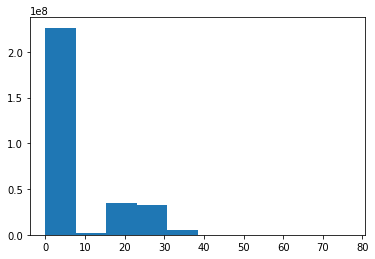

In [ ]:
plt.hist(mdata_expo_entr_alpha.flatten())

(array([  8387.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 120573.]),
 array([  0. ,  25.6,  51.2,  76.8, 102.4, 128. , 153.6, 179.2, 204.8,
        230.4, 256. ]),
 <a list of 10 Patch objects>)

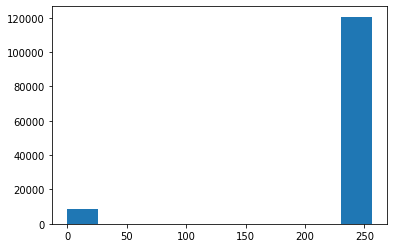

In [ ]:
plt.hist(mdata_expo_poligonos.flatten())

(array([3.18986172e+08, 2.94859190e+07, 4.09378480e+07, 3.82429740e+07,
        3.21837340e+07, 2.24921050e+07, 1.59644630e+07, 1.00792910e+07,
        6.75476500e+06, 8.65507730e+07]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ], dtype=float32),
 <a list of 10 Patch objects>)

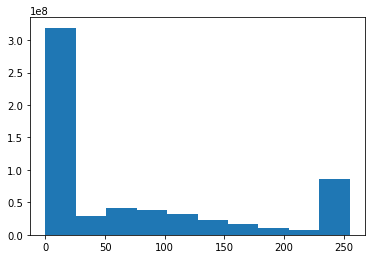

In [ ]:
plt.hist(mdata_expo_razao_VH_VV.flatten())

In [ ]:
ds_expo_dprvi.meta

{'count': 1,
 'crs': CRS.from_epsg(4326),
 'driver': 'GTiff',
 'dtype': 'float32',
 'height': 11367,
 'nodata': 3.3999999521443642e+38,
 'transform': Affine(0.00013160318912350987, 0.0, -60.900386018843214,
       0.0, -0.00013160318912350987, -6.372438915518303),
 'width': 13233}

In [ ]:
ds_expo_sigma0.meta

{'count': 2,
 'crs': CRS.from_epsg(4326),
 'driver': 'GTiff',
 'dtype': 'float32',
 'height': 11367,
 'nodata': 0.0,
 'transform': Affine(0.00013160318912350987, 0.0, -60.900386018843214,
       0.0, -0.00013160318912350987, -6.372438915518303),
 'width': 13233}

In [ ]:
ds_expo_entr_alpha.meta

{'count': 2,
 'crs': CRS.from_epsg(4326),
 'driver': 'GTiff',
 'dtype': 'float32',
 'height': 11367,
 'nodata': 0.0,
 'transform': Affine(0.00013160318912350987, 0.0, -60.900386018843214,
       0.0, -0.00013160318912350987, -6.372438915518303),
 'width': 13233}

In [ ]:
ds_expo_razao_VH_VV.meta

{'count': 4,
 'crs': CRS.from_epsg(4326),
 'driver': 'GTiff',
 'dtype': 'float32',
 'height': 11367,
 'nodata': None,
 'transform': Affine(0.00013160318912350987, 0.0, -60.900386018843214,
       0.0, -0.00013160318912350987, -6.372438915518303),
 'width': 13233}

In [ ]:
ds_expo_poligonos.meta

{'count': 1,
 'crs': CRS.from_epsg(4326),
 'driver': 'GTiff',
 'dtype': 'int16',
 'height': 310,
 'nodata': 256.0,
 'transform': Affine(0.0048235073357572045, 0.0, -60.902251013057,
       0.0, -0.0048351302449999925, -6.371946782357),
 'width': 416}

## **3. Visualiznado as imagens**

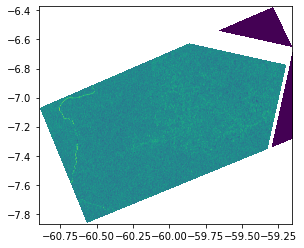

In [ ]:
show(ds_expo_dprvi)

(array([1.8600000e+03, 3.3333100e+05, 5.0065930e+06, 1.6207733e+07,
        2.2273890e+07, 1.7576494e+07, 9.0551060e+06, 3.1417120e+06,
        6.9741100e+05, 6.9737000e+04]),
 array([7.7998557e-08, 9.9760212e-02, 1.9952033e-01, 2.9928046e-01,
        3.9904061e-01, 4.9880072e-01, 5.9856087e-01, 6.9832098e-01,
        7.9808110e-01, 8.9784127e-01, 9.9760139e-01], dtype=float32),
 <a list of 10 Patch objects>)

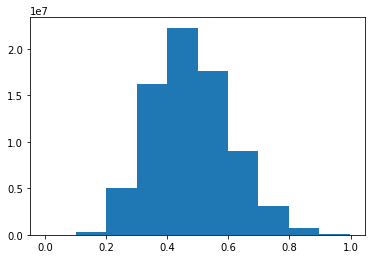

In [ ]:
dprvi=mdata_expo_dprvi
dprvi[dprvi==3.3999999521443642e+38]=np.nan
dprvi[dprvi==0]=np.nan
plt.hist(dprvi.flatten())


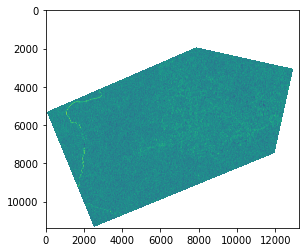

In [ ]:
show(dprvi)

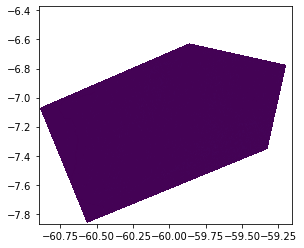

In [ ]:
show(ds_expo_sigma0)

In [ ]:
sigma0=mdata_expo_sigma0
sigma0[sigma0==24.49624]=np.nan
plt.plot(sigma0.flatten())

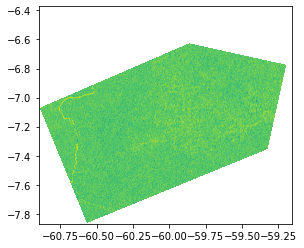

In [ ]:
show(ds_expo_entr_alpha)

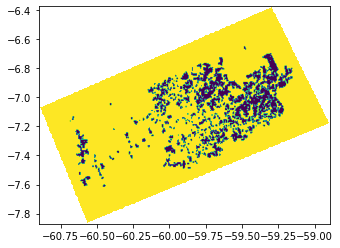

In [ ]:
show(ds_expo_poligonos)

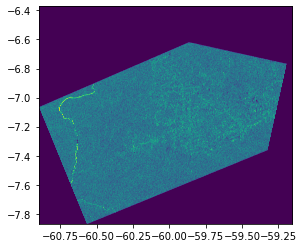

In [ ]:
show(ds_expo_razao_VH_VV)

TypeError: ignored

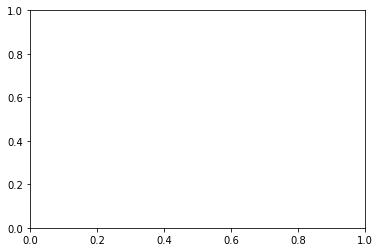

In [ ]:
plt.hist(ds_expo_razao_VH_VV)